# Embed SLAM Models Comparison

This notebook compares the models from `embed_slam`: ConceptFusion, DINOFusion, XFusion, and NARadioFusion.

In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

from vlm_eval.core import EncoderRegistry
from vlm_eval.encoders import *

# Ensure models are registered
print("Available encoders:", EncoderRegistry.list_available())

2025-12-12 07:53:22.820595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available encoders: ['clip', 'concept_fusion', 'dino_fusion', 'naradio', 'naradio_fusion', 'radio', 'simple_cnn', 'x_fusion']


In [2]:
# Load Models
# Note: You need to have the necessary checkpoints and dependencies installed.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

models = {}
model_names = ["concept_fusion", "dino_fusion", "x_fusion", "naradio_fusion"]

for name in model_names:
    try:
        print(f"Loading {name}...")
        models[name] = EncoderRegistry.get(name, device=device)
        print(f"Loaded {name}")
    except Exception as e:
        print(f"Failed to load {name}: {e}")


Using device: cuda
Loading concept_fusion...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda


Loaded concept_fusion
Loading dino_fusion...


config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

Loaded dino_fusion
Loading x_fusion...


Device set to use cuda


Loaded x_fusion
Loading naradio_fusion...


Using cache found in /home/jovyan/.cache/torch/hub/NVlabs_RADIO_main
Bad pipe message: %s [b'\r\nx-proxycontextpath: /user/bjoern/vscode\r\nx-forwarded-context: /user/bjoern/vscode\r\ncookie: jupyte', b'ub-user-bjoern=2|1:0|10:1765523347|22:jupyterhub-user-bjoern|40:WGpIbmtaalM0WEp2cUhWQUt5QTJhS0lzVXBNSWNK|2d6d3bb3']
Bad pipe message: %s [b'9705ae940667331c56e4048b641933476a5578a077a8682']
Bad pipe message: %s [b'673d3; _xsrf=MnwxOjB8MTA6MTc2NTUyMzM0N3w1Ol94c3JmfDE']
Bad pipe message: %s [b'jpOekJqTVdVM00yVmxaalEzTkdKbU9UZzBZekV4T0dZMU0yVm1NbVJrWkdFNllXUTNPREkyTnpRME5qTTJORE00TkdZM01HRTJNbVV3WW1Ga01qUm1aalUxTm', b'Mk16WXpPR1EzTVdZNE4yVTJaR1k0WTJObVkyWmpabU5sWkRFNE53PT18ZWQ1ZGVjY2I1ZTdmZjIwMmY1ZWFjZGRjMWIyODY1MDM2NzRhM2U4MmU']
Bad pipe message: %s [b'DY4ZmMyYjA5YzVlNmYyMzlhYzU1ZQ; _gcl_au=1.1.3597128', b'.1765287732; _fbp=fb.2.1765287732319.6599958706562960', b'; _ga=GA1.1.1228820877.1765287735; jupyterhub-sessio', b'id=70c1e73eef474bf984c118f53ef2ddda; _ga_D7M52048HH=GS2.1.s1765292332$

Loaded naradio_fusion


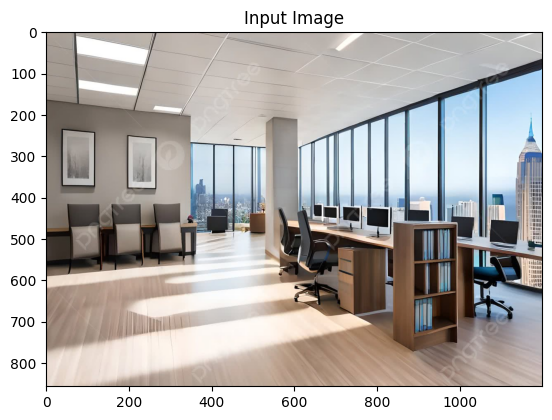

Image tensor shape: torch.Size([1, 3, 857, 1200])


In [3]:
# Load a sample image
# Replace with your image path
image_path = "../examples/example_office.jpg"
if not os.path.exists(image_path):
    # Create a dummy image if not exists
    dummy_img = Image.fromarray(np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8))
    dummy_img.save(image_path)
    print(f"Created dummy image at {image_path}")

image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.title("Input Image")
plt.show()

# Preprocess
image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).float() / 255.0
image_tensor = image_tensor.unsqueeze(0).to(device)
print("Image tensor shape:", image_tensor.shape)

Running concept_fusion...


TypeError: string indices must be integers, not 'str'

Bad pipe message: %s [b'7646 HTTP/1.1\r\nconnection: close\r\nx-forwarded-p']
Bad pipe message: %s [b'fix: /user/bjoern/vscode\r\nx-proxycontextpath: /user/bjoern/vscode\r\nx-forwarded-context: /user/bjoern/vscode\r\ncook', b': jupyterhub-user-bjoern=2|1:0|10:1765523347|22:jupyterhub-user-bjoern|40:WGpIbmtaalM0WEp2cUhWQUt5QTJhS0', b'VXBNSWNK|2d6d3bb3089705ae940667331c56e4048b641933476a5578a077a868258673d3; _xsrf=MnwxOjB8MTA6MTc2NTUyMzM0N3']
Bad pipe message: %s [b'Ol94c3JmfDEzMjpOekJqTVdVM00yVmxaalEzTkdKbU9UZzBZekV4T0dZMU0yVm1NbVJrWkdFNllXUTNPREkyTnpRME5qTTJORE00TkdZM01HRTJNbVV3WW', b'a01qUm1aalUxTmprMk16WXpPR1EzTVdZNE4yVTJaR1k0WTJO', b'kyWmpabU5sWkRFNE53PT18ZWQ1ZGVjY2I1ZTdmZjIwMmY1ZWFjZGRjMWIyODY1MDM2NzRhM2U4MmU3ODY4ZmMyYjA5YzVlNmY']
Bad pipe message: %s [b'zlhYzU1ZQ; _gcl_au=1.1.359712863.1765287732; _fbp=fb.2.1765287732319.659995870656296059; _ga=GA1.1.1228820877.1765287735', b'jupyterhub-session-id=70c1e73eef474bf984c118f53ef2ddda; _g']
Bad pipe message: %s [b'D7M52048HH=GS2.1.s176

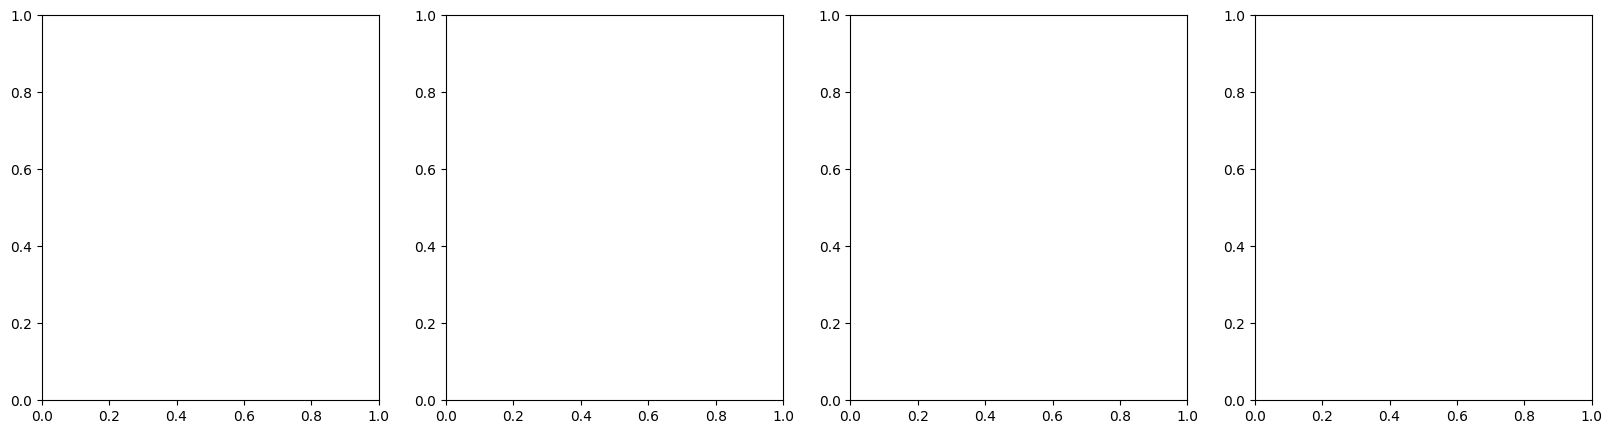

In [4]:
# Run Inference and Compare
text_query = "chair"

fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
if len(models) == 1:
    axes = [axes]

for i, (name, model) in enumerate(models.items()):
    print(f"Running {name}...")
    with torch.no_grad():
        # Get image features
        features = model(image_tensor) # (B, C, H, W)
        
        # Get text features
        text_emb = model.encode_text([text_query]) # (1, C)
        
        # Compute similarity
        # features: (1, C, H, W)
        # text_emb: (1, C)
        sim = torch.einsum("bchw,bc->bhw", features, text_emb)
        
        sim_map = sim[0].cpu().numpy()
        
        axes[i].imshow(sim_map, cmap="jet")
        axes[i].set_title(f"{name} - '{text_query}'")
        axes[i].axis("off")

plt.tight_layout()
plt.show()

Running concept_fusion...
  !! skipping concept_fusion: TypeError: string indices must be integers, not 'str'
Running dino_fusion...
  !! skipping dino_fusion: RuntimeError: shape '[1, 1024, 14, 14]' is invalid for input of size 204800
Running x_fusion...
  !! skipping x_fusion: TypeError: string indices must be integers, not 'str'
Running naradio_fusion...
  -> resized to (768, 1024)


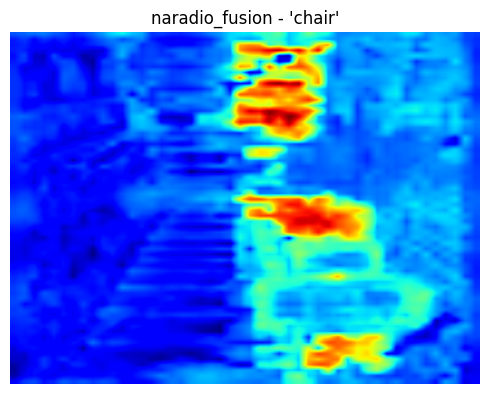

In [5]:
import math
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

VALID_RESOLUTIONS = [
    (192, 192), (224, 224), (256, 256), (288, 288), (320, 320), (384, 384),
    (448, 448), (512, 512), (640, 640), (768, 768), (896, 896), (1024, 1024),
    (256, 384), (384, 256), (336, 448), (448, 336), (512, 768), (768, 512),
    (512, 896), (896, 512), (720, 1280), (800, 1280), (768, 1024), (1024, 768),
]

def is_naradio_like(enc):
    return hasattr(getattr(enc, "model", None), "naradio") and hasattr(enc.model.naradio, "input_resolution")

def pick_best_resolution(hw, candidates):
    h, w = hw
    ar = w / h
    best = None
    best_score = float("inf")
    for H, W in candidates:
        ar2 = W / H
        score = abs(math.log(ar2 / ar)) + 0.15 * abs(math.log((H * W) / (h * w)))
        if score < best_score:
            best_score = score
            best = (H, W)
    return best

def letterbox_to(x, target_hw):
    B, C, H, W = x.shape
    th, tw = target_hw
    scale = min(tw / W, th / H)
    nh = int(round(H * scale))
    nw = int(round(W * scale))
    x = F.interpolate(x, size=(nh, nw), mode="bilinear", align_corners=False)

    pad_h = th - nh
    pad_w = tw - nw
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    return F.pad(x, (left, right, top, bottom), value=0.0)

def ensure_bchw(feats):
    # Accept (B,C,H,W). Anything else -> error.
    if not isinstance(feats, torch.Tensor):
        raise TypeError(f"Model returned {type(feats)} not a Tensor")
    if feats.ndim != 4:
        raise ValueError(f"Expected features (B,C,H,W) but got shape {tuple(feats.shape)}")
    return feats

text_query = "chair"

# run models, collect successful ones for plotting
ok = []

for name, model in models.items():
    print(f"Running {name}...")
    try:
        if is_naradio_like(model):
            target_hw = pick_best_resolution(image_tensor.shape[-2:], VALID_RESOLUTIONS)
            img_in = letterbox_to(image_tensor, target_hw)
            print(f"  -> resized to {target_hw}")
        else:
            img_in = image_tensor

        with torch.no_grad():
            feats = ensure_bchw(model(img_in))
            txt = model.encode_text([text_query])
            feats = F.normalize(feats, dim=1)
            txt = F.normalize(txt, dim=1)
            sim = torch.einsum("bchw,bc->bhw", feats, txt)[0].cpu().numpy()

        ok.append((name, sim))
    except Exception as e:
        print(f"  !! skipping {name}: {type(e).__name__}: {e}")

# plot only successful models
if len(ok) == 0:
    raise RuntimeError("No models ran successfully.")

fig, axes = plt.subplots(1, len(ok), figsize=(5 * len(ok), 5))
if len(ok) == 1:
    axes = [axes]

for ax, (name, sim_map) in zip(axes, ok):
    ax.imshow(sim_map, cmap="jet")
    ax.set_title(f"{name} - '{text_query}'")
    ax.axis("off")

plt.tight_layout()
plt.show()


Running concept_fusion...
  !! skipping concept_fusion: RuntimeError: SAM-based segmenter output mismatch; needs library patch. Skipping.
Running dino_fusion...
  -> resize 224x224 (ViT 14x14 grid)
  !! skipping dino_fusion: RuntimeError: shape '[1, 1024, 14, 14]' is invalid for input of size 204800
Running x_fusion...
  !! skipping x_fusion: RuntimeError: SAM-based segmenter output mismatch; needs library patch. Skipping.
Running naradio_fusion...
  -> letterbox (768, 1024)


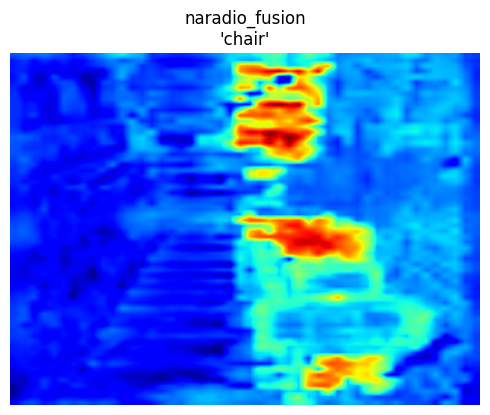

In [7]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

VALID_RESOLUTIONS_NARADIO = [
    (192, 192), (224, 224), (256, 256), (288, 288), (320, 320), (384, 384),
    (448, 448), (512, 512), (640, 640), (768, 768), (896, 896), (1024, 1024),
    (256, 384), (384, 256), (336, 448), (448, 336), (512, 768), (768, 512),
    (512, 896), (896, 512), (720, 1280), (800, 1280), (768, 1024), (1024, 768),
]

def is_naradio_like(enc):
    return hasattr(getattr(enc, "model", None), "naradio") and hasattr(enc.model.naradio, "input_resolution")

def pick_best_resolution(hw, candidates):
    h, w = hw
    ar = w / h
    best = None
    best_score = float("inf")
    for H, W in candidates:
        ar2 = W / H
        score = abs(math.log(ar2 / ar)) + 0.15 * abs(math.log((H * W) / (h * w)))
        if score < best_score:
            best_score = score
            best = (H, W)
    return best

def resize_to(x, hw):
    return F.interpolate(x, size=hw, mode="bilinear", align_corners=False)

def letterbox_to(x, target_hw):
    B, C, H, W = x.shape
    th, tw = target_hw
    scale = min(tw / W, th / H)
    nh = int(round(H * scale))
    nw = int(round(W * scale))
    x = F.interpolate(x, size=(nh, nw), mode="bilinear", align_corners=False)

    pad_h = th - nh
    pad_w = tw - nw
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    return F.pad(x, (left, right, top, bottom), value=0.0)

def ensure_bchw(feats):
    if not isinstance(feats, torch.Tensor):
        raise TypeError(f"Model returned {type(feats)} not a Tensor")
    if feats.ndim != 4:
        raise ValueError(f"Expected (B,C,H,W), got {tuple(feats.shape)}")
    return feats

def prepare_input_for_model(name, model, image_tensor):
    lname = name.lower()

    # SAM-based fusion models are broken right now (segmenter output mismatch)
    if "concept_fusion" in lname or "x_fusion" in lname:
        raise RuntimeError("SAM-based segmenter output mismatch; needs library patch. Skipping.")

    # DINO/VIT fusion: force 224x224 (14x14 tokens for patch=16)
    if "dino" in lname:
        return resize_to(image_tensor, (224, 224)), "resize 224x224 (ViT 14x14 grid)"

    # NARadio: letterbox to a supported resolution
    if is_naradio_like(model):
        target_hw = pick_best_resolution(image_tensor.shape[-2:], VALID_RESOLUTIONS_NARADIO)
        return letterbox_to(image_tensor, target_hw), f"letterbox {target_hw}"

    # default: no change
    return image_tensor, "native"

# --- Run & plot ---
text_query = "chair"
ok = []

for name, model in models.items():
    print(f"Running {name}...")
    try:
        img_in, how = prepare_input_for_model(name, model, image_tensor)
        print(f"  -> {how}")

        with torch.no_grad():
            feats = ensure_bchw(model(img_in))
            txt = model.encode_text([text_query])

            feats = F.normalize(feats, dim=1)
            txt = F.normalize(txt, dim=1)

            sim = torch.einsum("bchw,bc->bhw", feats, txt)[0].cpu().numpy()

        ok.append((name, sim))
    except Exception as e:
        print(f"  !! skipping {name}: {type(e).__name__}: {e}")

if not ok:
    raise RuntimeError("No models ran successfully.")

fig, axes = plt.subplots(1, len(ok), figsize=(5 * len(ok), 5))
if len(ok) == 1:
    axes = [axes]

for ax, (name, sim_map) in zip(axes, ok):
    ax.imshow(sim_map, cmap="jet")
    ax.set_title(f"{name}\n'{text_query}'")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import math
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

VALID_RESOLUTIONS = [
    (192, 192), (224, 224), (256, 256), (288, 288), (320, 320), (384, 384),
    (448, 448), (512, 512), (640, 640), (768, 768), (896, 896), (1024, 1024),
    (256, 384), (384, 256), (336, 448), (448, 336), (512, 768), (768, 512),
    (512, 896), (896, 512), (720, 1280), (800, 1280), (768, 1024), (1024, 768),
]

def tensor_to_img(x):  # (1,3,H,W) -> (H,W,3) float [0,1]
    x = x[0].detach().cpu().permute(1, 2, 0).numpy()
    return np.clip(x, 0.0, 1.0)

def normalize_map(m):
    m = m.astype(np.float32)
    m = m - m.min()
    return m / (m.max() + 1e-8)

def letterbox_to(x, target_hw):
    # x: (B,C,H,W), target_hw: (H,W)
    B, C, H, W = x.shape
    th, tw = target_hw

    scale = min(tw / W, th / H)
    nh = int(round(H * scale))
    nw = int(round(W * scale))

    x = F.interpolate(x, size=(nh, nw), mode="bilinear", align_corners=False)

    pad_h = th - nh
    pad_w = tw - nw
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left

    return F.pad(x, (left, right, top, bottom), value=0.0)

def run_all_resolutions_for_model(model, image_tensor, text_query, resolutions, device=None):
    if device is None:
        device = image_tensor.device

    # encode text once
    with torch.no_grad():
        text_emb = model.encode_text([text_query]).to(device)
        text_emb = F.normalize(text_emb, dim=1)

    results = []
    for hw in resolutions:
        img_in = letterbox_to(image_tensor, hw)

        with torch.no_grad():
            feats = model(img_in)              # (1,C,H,W)
            feats = F.normalize(feats, dim=1)

            sim = torch.einsum("bchw,bc->bhw", feats, text_emb)  # (1,H,W)
            sim_map = sim[0].detach().cpu().numpy()
            sim_norm = normalize_map(sim_map)

        results.append((hw, img_in.detach().cpu(), sim_norm))

        # keep GPU memory sane
        del img_in, feats, sim

    return results

def plot_resolution_grid(model_name, image_tensor, text_query, results, max_cols=4):
    orig_img = tensor_to_img(image_tensor)

    # We will plot: 1 "Original" + for each res: (heatmap, overlay)
    n_tiles = 1 + 2 * len(results)
    ncols = max_cols
    nrows = math.ceil(n_tiles / ncols)

    fig = plt.figure(figsize=(4.2 * ncols, 3.6 * nrows))
    fig.suptitle(f"{model_name} — all resolutions — query='{text_query}'", fontsize=14)

    def add_ax(idx):
        ax = fig.add_subplot(nrows, ncols, idx + 1)
        ax.axis("off")
        return ax

    k = 0

    # (0) Original
    ax = add_ax(k); k += 1
    ax.imshow(orig_img)
    ax.set_title("Original", fontsize=10)

    # Each resolution: heatmap + overlay (on the exact letterboxed input)
    for (H, W), img_in_cpu, sim_norm in results:
        in_img = tensor_to_img(img_in_cpu)

        ax = add_ax(k); k += 1
        ax.imshow(sim_norm, cmap="jet")
        ax.set_title(f"Heatmap {H}×{W}", fontsize=10)

        ax = add_ax(k); k += 1
        ax.imshow(in_img)
        ax.imshow(sim_norm, cmap="jet", alpha=0.45)
        ax.set_title(f"Overlay {H}×{W}", fontsize=10)

    plt.tight_layout()
    plt.show()

# ---- run for all models ----
text_query = "chair"

for name, model in models.items():
    print(f"\n=== {name} ===")
    results = run_all_resolutions_for_model(
        model=model,
        image_tensor=image_tensor,
        text_query=text_query,
        resolutions=VALID_RESOLUTIONS,
    )
    plot_resolution_grid(name, image_tensor, text_query, results, max_cols=4)


In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# ---- if your image_tensor is ImageNet-normalized, set these; else set to None ----
IMAGENET_MEAN = None  # (0.485, 0.456, 0.406)
IMAGENET_STD  = None  # (0.229, 0.224, 0.225)

def denorm_if_needed(x):
    # x: (1,3,H,W)
    if IMAGENET_MEAN is None or IMAGENET_STD is None:
        return x
    mean = torch.tensor(IMAGENET_MEAN, device=x.device).view(1,3,1,1)
    std  = torch.tensor(IMAGENET_STD,  device=x.device).view(1,3,1,1)
    return x * std + mean

def to_float01_rgb(x):
    # ensure model input is float in [0,1]
    x = denorm_if_needed(x)
    return x.clamp(0, 1)

def tensor_to_img01(x):  # (1,3,H,W) -> (H,W,3)
    x = x[0].detach().cpu().permute(1,2,0).numpy()
    return np.clip(x, 0.0, 1.0)

def letterbox_with_mask(x, target_hw):
    # returns padded image and a mask of valid (non-pad) pixels
    B, C, H, W = x.shape
    th, tw = target_hw
    scale = min(tw / W, th / H)
    nh = int(round(H * scale))
    nw = int(round(W * scale))

    x_rs = F.interpolate(x, size=(nh, nw), mode="bilinear", align_corners=False)

    pad_h = th - nh
    pad_w = tw - nw
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left

    x_pad = F.pad(x_rs, (left, right, top, bottom), value=0.0)

    mask = torch.zeros((1, 1, th, tw), device=x.device, dtype=x.dtype)
    mask[:, :, top:top+nh, left:left+nw] = 1.0
    return x_pad, mask

def robust_norm(sim, mask=None, lo=5, hi=95):
    # sim: (H,W) numpy, mask: (H,W) numpy {0,1} optional
    if mask is not None:
        vals = sim[mask > 0.5]
    else:
        vals = sim.reshape(-1)
    if vals.size == 0:
        return np.zeros_like(sim, dtype=np.float32), (0.0, 1.0)

    vmin = np.percentile(vals, lo)
    vmax = np.percentile(vals, hi)
    if vmax <= vmin + 1e-8:
        vmax = vmin + 1e-8
    simn = (sim - vmin) / (vmax - vmin)
    return np.clip(simn, 0, 1).astype(np.float32), (float(vmin), float(vmax))

def overlay(ax, base_img01, heat01, alpha=0.45):
    ax.imshow(base_img01)
    ax.imshow(heat01, cmap="jet", alpha=alpha, interpolation="nearest")

# ----------------- main comparison -----------------

def run_all_resolutions_compare(model, image_tensor, text_query, resolutions):
    device = image_tensor.device
    img01 = to_float01_rgb(image_tensor)

    with torch.no_grad():
        text_emb = model.encode_text([text_query]).to(device)
        text_emb = F.normalize(text_emb, dim=1)

    # first pass: collect raw sims + masks so we can normalize consistently per model
    sims = []
    masks = []
    imgs_in = []

    for (H, W) in resolutions:
        img_in, mask = letterbox_with_mask(img01, (H, W))

        with torch.no_grad():
            feats = model(img_in)
            feats = F.normalize(feats, dim=1)
            sim = torch.einsum("bchw,bc->bhw", feats, text_emb)[0]  # (H,W)
        sims.append(sim.detach().cpu().numpy())
        masks.append(mask[0,0].detach().cpu().numpy())
        imgs_in.append(img_in.detach().cpu())

        del img_in, mask, feats, sim

    # compute ONE normalization range for the whole model across all resolutions (excluding padding)
    all_vals = np.concatenate([s[m > 0.5].ravel() for s, m in zip(sims, masks) if (m > 0.5).any()])
    vmin = np.percentile(all_vals, 5)
    vmax = np.percentile(all_vals, 95)
    if vmax <= vmin + 1e-8:
        vmax = vmin + 1e-8

    # plot grid: Original + for each res: Heatmap, Overlay
    n_tiles = 1 + 2 * len(resolutions)
    ncols = 4
    nrows = int(np.ceil(n_tiles / ncols))
    fig = plt.figure(figsize=(4.2*ncols, 3.6*nrows))
    fig.suptitle(f"{text_query} — {getattr(model, 'name', 'model')} (consistent norm, padding masked)", fontsize=14)

    k = 1
    ax = fig.add_subplot(nrows, ncols, k); k += 1
    ax.axis("off")
    ax.imshow(tensor_to_img01(img01))
    ax.set_title("Original", fontsize=10)

    for (H, W), sim_np, mask_np, img_in_cpu in zip(resolutions, sims, masks, imgs_in):
        simn = np.clip((sim_np - vmin) / (vmax - vmin), 0, 1).astype(np.float32)
        simn_masked = simn * mask_np  # zero out padding visually too

        ax = fig.add_subplot(nrows, ncols, k); k += 1
        ax.axis("off")
        ax.imshow(simn_masked, cmap="jet", interpolation="nearest")
        ax.set_title(f"Heat {H}×{W}", fontsize=10)

        ax = fig.add_subplot(nrows, ncols, k); k += 1
        ax.axis("off")
        base = tensor_to_img01(img_in_cpu)
        overlay(ax, base, simn_masked, alpha=0.45)
        ax.set_title(f"Overlay {H}×{W}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Example:
run_all_resolutions_compare(models["naradio_fusion"], image_tensor, "screen", VALID_RESOLUTIONS)
